In [1]:
!pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.7 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 7.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 8.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 7.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  A

In [2]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [3]:
print("running...")

running...


### **Libraries and datasets**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,Input,Flatten,GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")

In [5]:
path="/kaggle/input/emnist/"

In [6]:
mapping_file=pd.read_csv(path+"emnist-balanced-mapping.txt",header=None, sep = ' ')
mapping_file

,0,1
0,0,48
1,1,49
2,2,50
3,3,51
4,4,52
5,5,53
6,6,54
7,7,55
8,8,56
9,9,57


In [7]:
training_data=pd.read_csv(path+"emnist-balanced-train.csv",header=None)
testing_data=pd.read_csv(path+"emnist-balanced-test.csv",header=None)
training_data.shape, testing_data.shape

((112800, 785), (18800, 785))

In [8]:
# training
y_train=np.array(training_data.iloc[:,0].values)
x_train=np.array(training_data.iloc[:,1:].values)
# testing
y_test=np.array(testing_data.iloc[:,0].values)
x_test=np.array(testing_data.iloc[:,1:].values)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((112800, 784), (112800,), (18800, 784), (18800,))

### **Visualize and processing data**

In [9]:
# Check unique label
unique_label=np.unique(y_train)
unique_label

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [10]:
map_dict = {}
asc_code = mapping_file[1].values
for i, v in enumerate(asc_code):
    map_dict[i] = chr(v)
    
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

* We see the data mapping points to 46 and is missing, so only get the data lines from around [0:36] - including numbers and capital letters

In [11]:
# Get only data has label from 0 to 36
acceptable_range = np.arange(0, 36)

training_data = training_data[training_data[0].isin(acceptable_range)]
testing_data = testing_data[testing_data[0].isin(acceptable_range)]
np.unique(training_data[0]),np.unique(testing_data[0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]))

In [12]:
num_classes=len(np.unique(training_data[0]))
num_classes

36

In [13]:
# Reset index after filter data
training_data.reset_index(inplace = True)
testing_data.reset_index(inplace = True)
training_data

,index,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Drop index column
training_data = training_data.drop(['index'], axis = 1)
testing_data = testing_data.drop(['index'], axis = 1)
training_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Split data
x_train=training_data.drop([0],axis=1).values
y_train=training_data[0]
x_test=testing_data.drop([0],axis=1).values
y_test=testing_data[0]

x_train.shape,x_test.shape

((86400, 784), (14400, 784))

Label: J


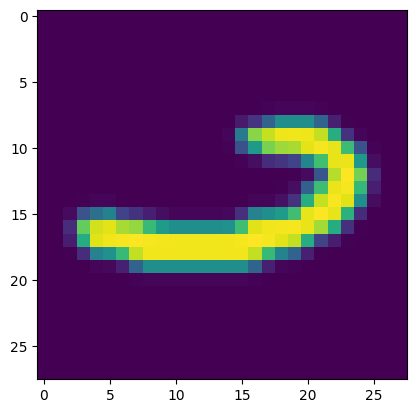

In [16]:
image_w,image_h=28,28
n_test_sample=100
sample=x_train[n_test_sample,:]
sample=sample.reshape(image_w,image_h)
print(f"Label: {map_dict[y_train[n_test_sample]]}")
plt.imshow(sample)
plt.show()

Test with many samples, it seems that images rotate **90** radian. So, we need flip and rotate it.

Label: J


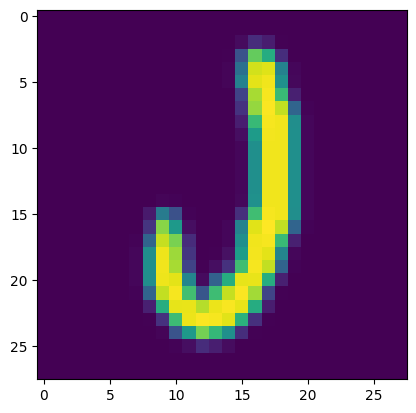

In [17]:
def flip_and_rotate(image,image_w,image_h):
    image = image.reshape(image_w, image_h)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print(f"Label: {map_dict[y_train[n_test_sample]]}")
plt.imshow(flip_and_rotate(sample,image_w,image_h))
plt.show()

It seem easily to see, we will aplly that for x_train and x_test

In [18]:
# reshape to ensure num_row not change
x_train = np.apply_along_axis(flip_and_rotate, 1, x_train, image_w, image_h)
x_train = x_train.reshape(-1, 784)

x_test = np.apply_along_axis(flip_and_rotate, 1, x_test, image_w, image_h)
x_test = x_test.reshape(-1, 784)

Label:8
Label:2
Label:2
Label:C
Label:0
Label:9
Label:D
Label:Z
Label:2
Label:L
Label:L
Label:F


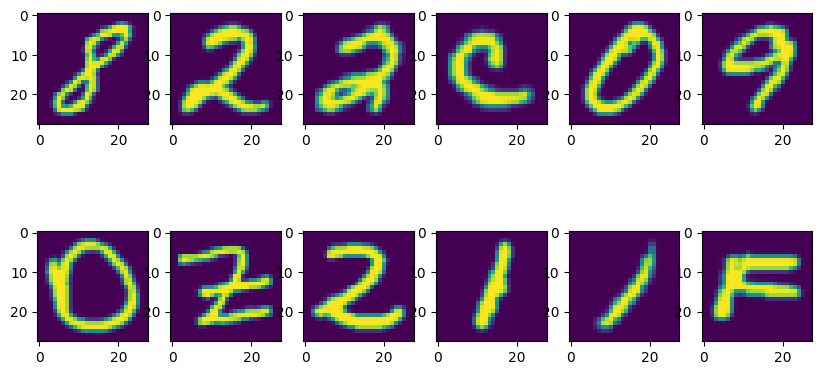

In [19]:
# Visualize image and label
plt.figure(figsize=(10, 8), dpi=100)
for i in range(500, 512):
    plt.subplot(3, 6, i-499)
    print(f"Label:{map_dict[y_train[i]]}")
    plt.imshow(x_train[i, :].reshape(28, 28))  # use reshape to change 2D array
plt.show()


### Modeling

In [20]:
def build_model():
    
    input_layer=Input(shape=(image_w,image_h,1))
    
    x = Conv2D(32, (3, 3), padding="same", activation="relu")(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Dropout(0.4)(x)
    x = Dense(num_classes, activation="softmax")(x)
   
    
    model=Model(inputs=input_layer,outputs=x)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

# Build model
model=build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256   

In [21]:
# x_train[:,1:]=x_train[:,1:]/255.0
# x_test[:,1:]=x_test[:,1:]/255.0

In [22]:
# Normalize input and label
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

In [23]:
# Apply reduce learning rate and early stopping techniquals to training model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [24]:
history = model.fit(x_train, y_train_encoded, 
                    batch_size=32, 
                    epochs=30, 
                    validation_split=0.2,
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/30
2160/2160 [==============================] - 78s 35ms/step - loss: 0.8650 - accuracy: 0.7696 - val_loss: 0.4213 - val_accuracy: 0.8874 - lr: 0.0010
Epoch 2/30
2160/2160 [==============================] - 76s 35ms/step - loss: 0.4623 - accuracy: 0.8688 - val_loss: 0.3617 - val_accuracy: 0.8969 - lr: 0.0010
Epoch 3/30
2160/2160 [==============================] - 76s 35ms/step - loss: 0.4138 - accuracy: 0.8783 - val_loss: 0.3430 - val_accuracy: 0.9013 - lr: 0.0010
Epoch 4/30
2160/2160 [==============================] - 76s 35ms/step - loss: 0.3897 - accuracy: 0.8856 - val_loss: 0.3367 - val_accuracy: 0.9019 - lr: 0.0010
Epoch 5/30
2160/2160 [==============================] - 76s 35ms/step - loss: 0.3725 - accuracy: 0.8890 - val_loss: 0.3217 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 6/30
2160/2160 [==============================] - 74s 34ms/step - loss: 0.3651 - accuracy: 0.8910 - val_loss: 0.3311 - val_accuracy: 0.9045 - lr: 0.0010
Epoch 7/30
2160/2160 [========================

In [25]:
model.save("my_model.h5")

In [26]:
def plot_training_history(history):
    # Get information from history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Visualize loss plot
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Visualize accuracy plot
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

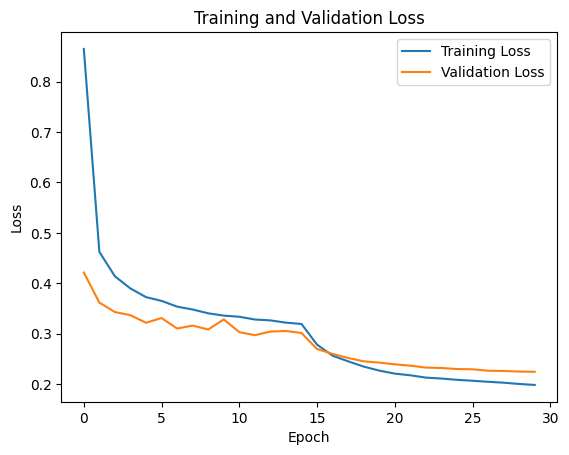

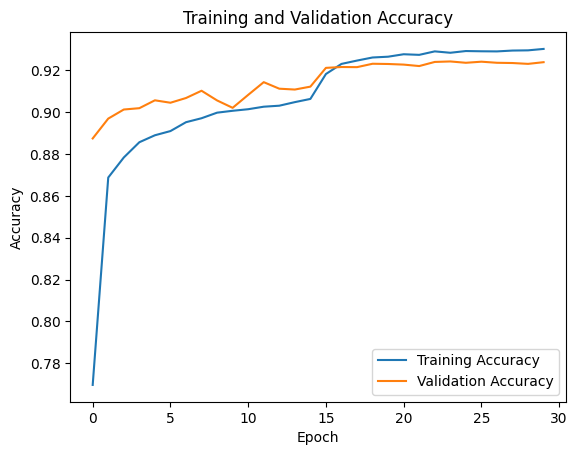

In [27]:
plot_training_history(history)

**Comment:**
* The error of the model on the training set and validation set decreased sharply in the first 15 epochs, gradually decreased until the 30th epoch and tended not to decrease anymore.
* The model's accuracy on the training set and validation set increased sharply in the first 15 epochs, gradually increased slowly until the 30th epoch, and tended to not increase anymore.

**Conclusion:** The model runs well on both training and validation set, does not seem to be overfitting.


### **Testing**

Label: X


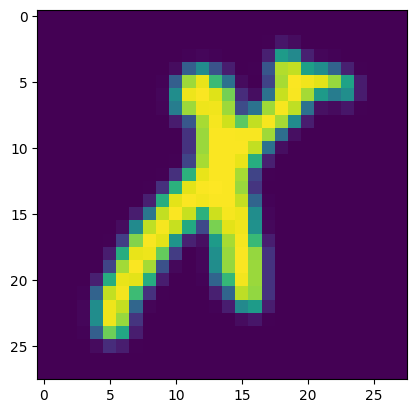

In [28]:
# Choose image to test randomly
n_index_test = random.randint(1, 14400)
n_index_test=14399
x_sample_test=x_test[n_index_test]
print(f"Label: {map_dict[y_test[n_index_test]]}")
plt.imshow(x_test[n_index_test, :].reshape(28, 28))

In [29]:
x_sample_test=x_sample_test.reshape(1, image_w, image_h, 1) # reshape

In [30]:
y_pred = model.predict(x_sample_test)
y_pred

1/1 [==============================] - 0s 156ms/step


array([[1.6616979e-09, 2.9290783e-07, 4.0024015e-06, 1.9546292e-10,
        3.9387396e-07, 3.4704814e-10, 1.0463214e-10, 6.5156764e-09,
        3.4153218e-06, 1.5305235e-10, 1.3522980e-05, 2.9014555e-10,
        2.9193551e-08, 2.4459668e-09, 6.5046994e-09, 5.0768301e-07,
        5.0647373e-08, 7.9514411e-06, 9.9694569e-07, 7.6741003e-07,
        1.6901863e-04, 7.0162318e-06, 2.3622964e-07, 3.2681248e-05,
        4.1350807e-09, 2.6312661e-09, 1.7000094e-07, 2.5832771e-06,
        8.3032420e-10, 4.1504651e-07, 1.7147649e-07, 8.5532079e-08,
        2.4468345e-09, 9.9974018e-01, 1.0522260e-05, 4.9914784e-06]],
      dtype=float32)

In [31]:
top_5 = np.argsort(y_pred[0])[:-6:-1]
top_5

array([33, 20, 23, 10, 34])

In [32]:
top_5_labels = [map_dict[i] for i in top_5]
print(top_5_labels)
print(f"Result: {top_5_labels[0]}")

['X', 'K', 'N', 'A', 'Y']
Result: X
